## Prepare

In [4]:
import gym 
import robohive
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import Image as IPyImage

    RoboHive: A unified framework for robot learning | https://sites.google.com/view/robohive
        Code: https://github.com/vikashplus/robohive/stargazers (add a star to support the project)
    


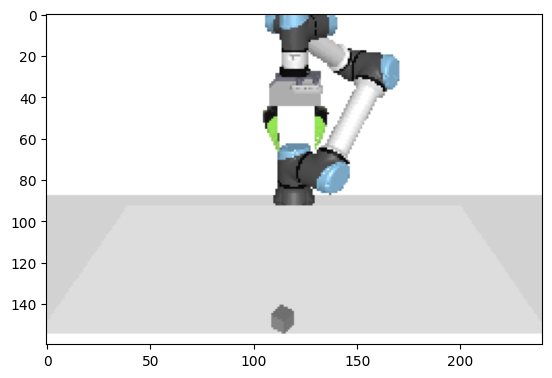

In [2]:
env = gym.make('Ur5Cube-v0')
env.reset();

obs = env.get_obs(update_exteroception=True)
plt.imshow(env.visual_dict['rgb:front:160x240:2d']);

In [6]:
env.obs_dict

{'time': array([1.]),
 'position': array([-2.3   , -2.3448,  1.8612, -1.0537, -1.5702, -0.73  ,  0.054 ]),
 'velocity': array([-2.1245e-06, -1.6447e-04,  3.6038e-04,  1.8113e-04, -6.1653e-06,
         6.3466e-07, -1.1129e-09])}

{'time': array([41.]),
 'position': array([-2.3   , -2.3448,  1.8612, -1.0537, -1.5702, -0.73  ,  0.054 ]),
 'velocity': array([ 1.0688e-13, -1.0574e-13,  4.9399e-14,  5.4372e-14,  5.3970e-14,
         2.7317e-14, -1.6142e-15])}

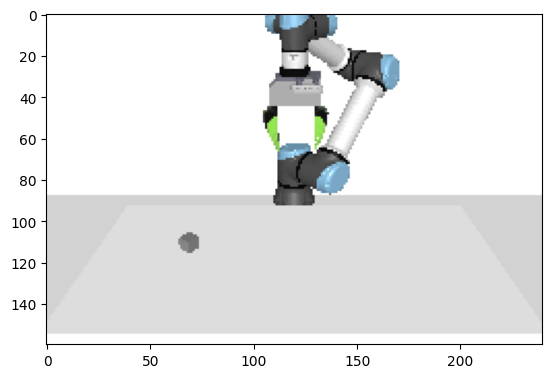

In [8]:
# perform action
for _ in range(100):
    action = [-2.30, -2.34, 1.85, -1.06, -1.57, -0.73, 0.054]
    allinfo_tdt = env.step(action)
    
obs = env.get_obs(update_exteroception=True)
plt.imshow(env.visual_dict['rgb:front:160x240:2d'])
env.obs_dict

## Replay trajectory

In [7]:
def save_gif(images, path='tmp.gif', width=300):
    images[0].save(path, format="GIF", append_images=images, save_all=True, duration=100, loop=0)
    
    with open('grasp_fixed.gif','rb') as f:
        return IPyImage(data=f.read(), format='png', width=width)

In [8]:
def replay_trajectory(trajectory, camera_name='rgb:front:160x240:2d'):
    images = []
    diffs = []
    target = []
    current = []
    
    for _ in range(100):
        env.step(trajectory[0])
        
    for action in trajectory:
        env.step(action)
        env.step(action)
        env.step(action)
        env.step(action)
        env.get_obs(update_exteroception=True)
        
        pos = env.obs_dict['position']
        diffs.append(abs(action - pos))
        target.append(action)
        current.append(pos)
        
        image = env.visual_dict[camera_name]
        images.append(Image.fromarray(image))
        
    return {
        'images': images,
        'diffs': np.array(diffs),
        'target': np.array(target),
        'current': np.array(current),
    }
        

In [9]:
trajectory = np.loadtxt('grasp_fixed.txt')
trajectory = np.delete(trajectory, 7, axis=1)
trajectory.shape

(24, 7)

In [10]:
result = replay_trajectory(trajectory)
images = result['images']
diffs = result['diffs']
target = result['target']
current = result['current']

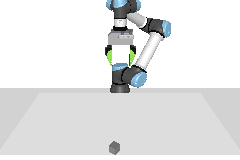

In [11]:
save_gif(images, 'grasp.gif')

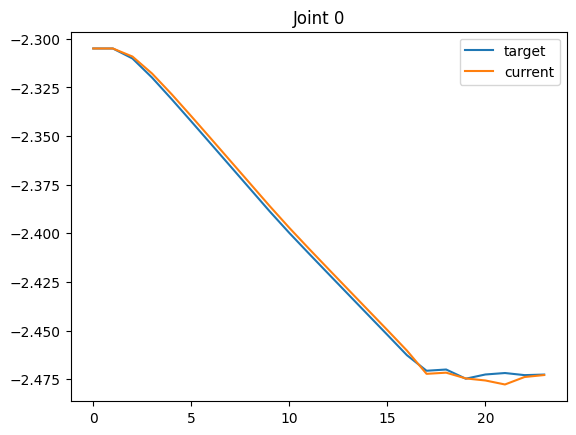

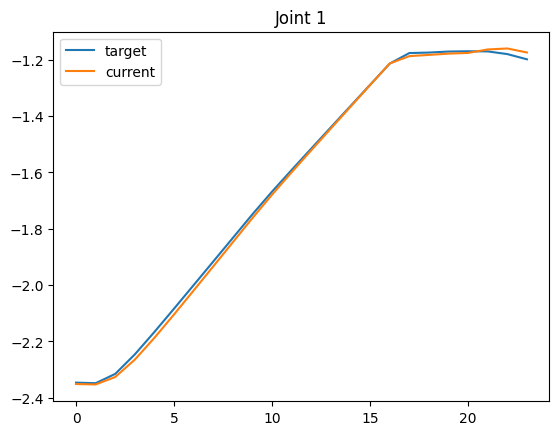

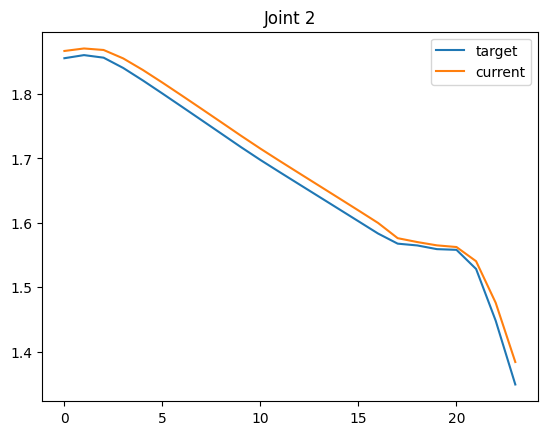

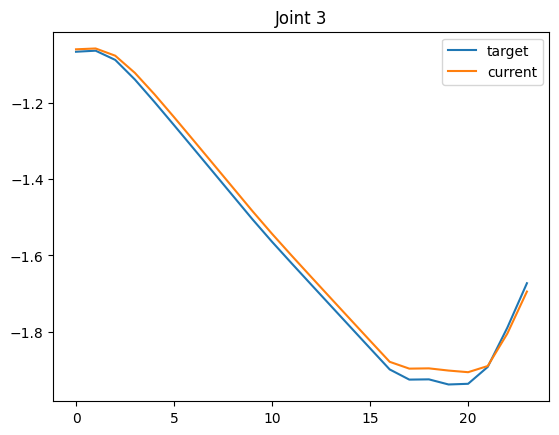

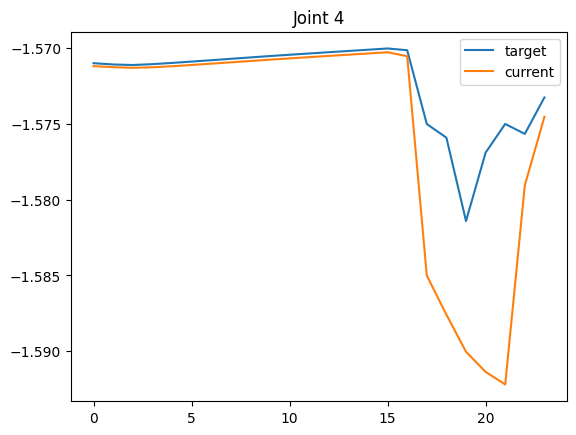

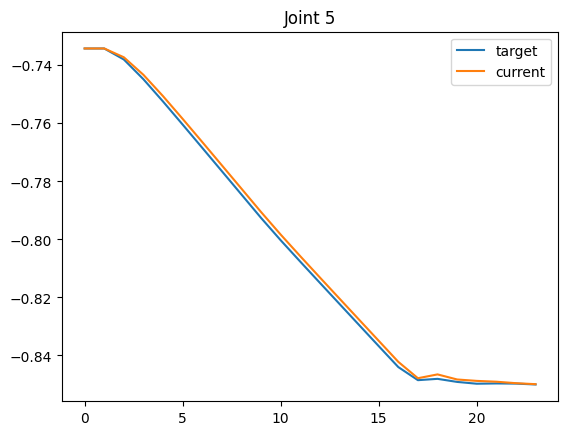

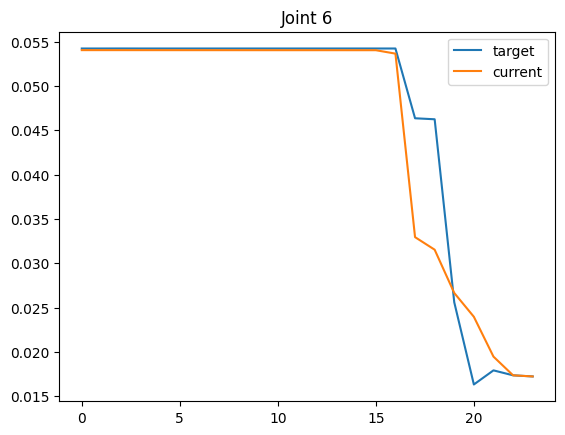

In [16]:
for i in range(7):
    plt.plot(target[:, i], label='target')
    plt.plot(current[:, i], label='current')
    plt.title(f'Joint {i}')
    plt.legend()
    plt.show()

## Cameras

rgb:top_down:160x240:2d


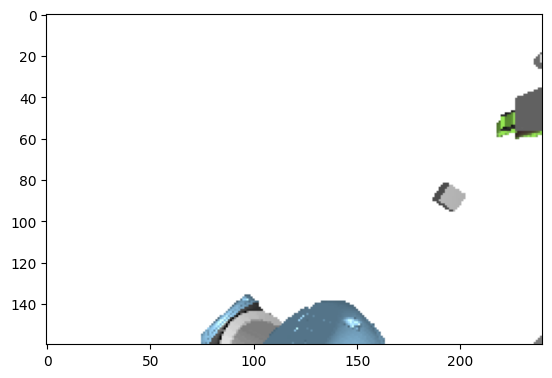

rgb:front:160x240:2d


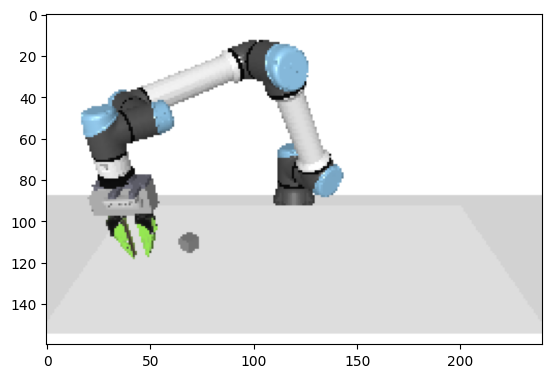

rgb:gripper:160x240:2d


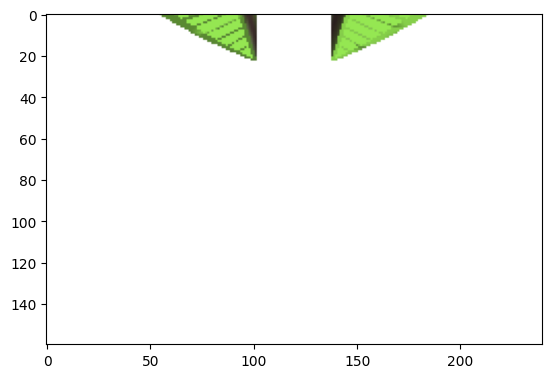

In [17]:
extero_dict = env.get_exteroception()
obs = env.get_obs(update_exteroception=True)
for key in env.visual_dict.keys():
    if key == 'time':
        continue
    print(key)
    plt.imshow(env.visual_dict[key])
    plt.show()